<a href="https://colab.research.google.com/github/Gabrielvinicius27/Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import HTML
import plotly.offline as py

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix

random.seed(0)

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/Gabrielvinicius27/Perceptron/main/Dados/Data_Perceptron.csv')
data = pd.DataFrame(data)

data.head() 

,x1,x2,x3,d
0,-0.6508,0.1097,4.0009,-1
1,-1.4492,0.8896,4.4005,-1
2,2.0850,0.6876,12.0710,-1
3,0.2626,1.1476,7.7985,1
4,0.6418,1.0234,7.0427,1


In [26]:
data.describe()

,x1,x2,x3,d
count,30.000000,30.000000,30.000000,30.000000
mean,0.272497,0.556747,6.531860,0.066667
std,0.918388,0.366427,2.449843,1.014833
min,-1.449200,-0.197300,1.725200,-1.000000
25%,-0.086700,0.233425,5.440000,-1.000000
50%,0.259750,0.611750,7.055200,1.000000
75%,0.519000,0.854050,7.485600,1.000000
max,2.448200,1.147600,12.071000,1.000000


In [46]:
fig = px.scatter_3d(data, x='x1', y='x2', z='x3',
                    color= data['d'].astype('category'),
                    labels = dict(color ='Saída D'),
                    title = 'Distribuição dos Dados',
                    height=800,
                    template = 'ggplot2')

fig.update_layout(title_font = {'family':'helvetica',
                                'size':30},
                  title_xref = 'paper',
                  title_x = 0.5,
                  title_xanchor = 'center',
                  legend_font=dict(size = 15))     
 
fig.show(renderer="colab")            
fig.show(renderer="notebook_connected")

In [28]:
entradas = data.loc[:,'x1':'x3']
saidas = data.loc[:,'d']
pesos = np.array([0.0, 0.0, 0.0])
pesosIniciais = np.array([0.0, 0.0, 0.0])
logpesos = [[0],[0],[0]]
taxaAprendizagem = 0.1

In [29]:
scaler = StandardScaler()

entradas = scaler.fit_transform(entradas)
print(entradas)

[[-1.02253157e+00 -1.24087254e+00 -1.05077220e+00]
 [-1.90674273e+00  9.23904802e-01 -8.84871291e-01]
 [ 2.00730919e+00  3.63211093e-01  2.29967061e+00]
 [-1.09603495e-02  1.64003835e+00  5.25867696e-01]
 [ 4.08995649e-01  1.29529499e+00  2.12084139e-01]
 [-1.72729792e-02  3.22685706e-01  7.45076108e-01]
 [ 9.33608402e-01  1.31994331e-01  3.78939936e-01]
 [-2.00560737e-01 -6.01903771e-01  2.22463325e-01]
 [-2.88383813e-01 -8.64541586e-02 -7.88926094e-01]
 [-3.49295153e-01 -2.51886560e-01 -4.56501519e-01]
 [ 1.78861534e-01  3.61545666e-01  7.04472732e-01]
 [ 1.11117049e-03  1.31000626e+00  2.74649873e-01]
 [ 2.34124731e-01 -1.98870472e-01  3.95712701e-01]
 [ 1.51063813e-01 -1.89705072e+00 -4.27605864e-01]
 [ 1.29198857e+00 -1.09736826e+00  8.52106276e-01]
 [-1.31125132e+00 -2.09301595e+00 -1.80002490e+00]
 [ 1.02888481e-01  1.36218964e+00  3.96044835e-01]
 [-6.43408324e-02  5.40579053e-01  2.64893438e-01]
 [-7.88488059e-02  1.23422934e+00  7.07445330e-03]
 [ 4.16194261e-01 -9.39430281e-

In [30]:
data_standard = pd.DataFrame(entradas, columns=['x1','x2','x3'])
data_standard['d'] = data['d']

fig = make_subplots(rows=2, cols=3,
                    subplot_titles = ("X1 antes da Padronização", "X2 antes da Padronização", "X3 antes da Padronização",
                                      "X1 depois da Padronização", "X2 depois da Padronização", "X3 depois da Padronização"))

cols = ['x1', 'x2', 'x3']
for column in range(1,4):
    fig.add_trace(
        go.Histogram(x=data[cols[column-1]], nbinsx = 20),
        row=1, col=column)
    

for column in range(1,4):
    fig.add_trace(
        go.Histogram(x=data_standard[cols[column-1]], nbinsx = 20),
        row=2, col=column)

fig.update_layout(height = 800,
                  title_text = 'Histogramas dos Dados Antes e Depois da Padronização',
                  title_font = {'family':'helvetica',
                                'size':30},
                  title_xref = 'paper',
                  title_x = 0.5,
                  title_xanchor = 'center',
                  showlegend = False,
                  template = 'ggplot2')                 

fig.show(renderer="colab")


In [31]:
def stepFunction(soma):
    if (soma > 0):
        return 1
    return -1

In [32]:
def calculaSaida(registro):
    s = registro.dot(pesos)
    #print(registro)
    #print(s)
    return stepFunction(s)

In [33]:
def treinar():
    epocas = 0
    erroTotal = 1000
    
    while (erroTotal >= 2):
        erroTotal = 0
        epocas += 1
        for i in range(len(saidas)):
            saidaCalculada = calculaSaida(np.asarray(entradas[i]))
            erro = saidas[i] - saidaCalculada
            if (erro == 0):
              erroTotal += 0
            if (erro != 0):
              erroTotal += 1
             
            for j in range(len(pesos)):
                pesos[j] = pesos[j] + (taxaAprendizagem * entradas[i,j] * erro)
                logpesos[j].append(pesos[j])
                #print('Peso atualizado: ' + str(pesos[j]))
                
        print('\nTOTAL DE ERROS: ' + str(erroTotal))
        print("NÚMERO DE EPOCAS: " + str(epocas))

In [34]:
treinar()

print('Rede neural treinada')




TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 1

TOTAL DE ERROS: 10
NÚMERO DE EPOCAS: 2

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 3

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 4

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 5

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 6

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 7

TOTAL DE ERROS: 3
NÚMERO DE EPOCAS: 8

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 9

TOTAL DE ERROS: 2
NÚMERO DE EPOCAS: 10

TOTAL DE ERROS: 3
NÚMERO DE EPOCAS: 11

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 12

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 13

TOTAL DE ERROS: 3
NÚMERO DE EPOCAS: 14

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 15

TOTAL DE ERROS: 2
NÚMERO DE EPOCAS: 16

TOTAL DE ERROS: 3
NÚMERO DE EPOCAS: 17

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 18

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 19

TOTAL DE ERROS: 3
NÚMERO DE EPOCAS: 20

TOTAL DE ERROS: 2
NÚMERO DE EPOCAS: 21

TOTAL DE ERROS: 2
NÚMERO DE EPOCAS: 22

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 23

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 24

TOTAL DE ERROS: 2
NÚMERO DE EPOCAS: 25

TOTAL D

In [35]:
print("Pesos iniciais:\n")
print(pesosIniciais[0])
print(pesosIniciais[1])
print(pesosIniciais[2])

print("\nPesos finais:\n")
print(pesos[0])
print(pesos[1])
print(pesos[2])

Pesos iniciais:

0.0
0.0
0.0

Pesos finais:

1.753882582786199
0.8981684051805505
-2.0765861992680072


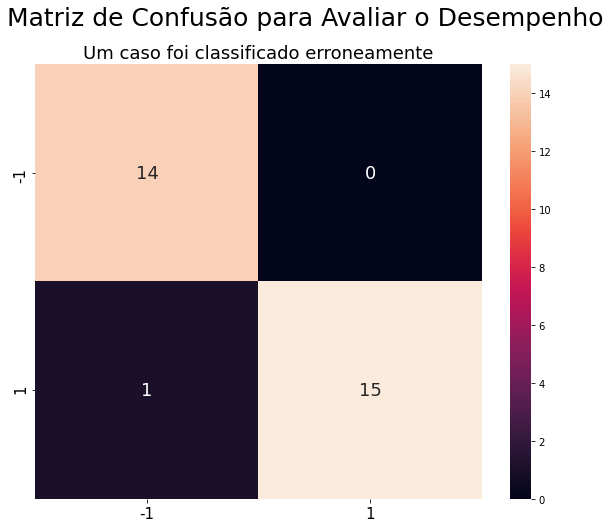

In [36]:
resultados = list()
for i in range(len(data['d'])):
    resultados.append(calculaSaida(np.asarray(entradas[i])))

data['resultados'] = resultados

plt.figure(figsize = (10,8))
ax = sns.heatmap(confusion_matrix(data['d'], data['resultados']), 
                 xticklabels = [-1,1],
                 yticklabels = [-1,1],
                 annot=True, 
                 annot_kws = {'size':18})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.suptitle('Matriz de Confusão para Avaliar o Desempenho', fontsize = 25)
plt.title('Um caso foi classificado erroneamente', fontsize = 18)
plt.show()

In [37]:
fig = px.scatter_3d(data_standard, x='x1', y='x2', z='x3',
                    color= data['d'].astype('category'),
                    labels = dict(color ='Saída D'),
                    height=800,
                    template = 'ggplot2')

(x, y) = np.meshgrid(np.arange(-2, 2.1, 1), np.arange(-2, 2, .25))
z = (x*pesos[0] + y*pesos[1])/-pesos[2] 

fig.add_surface(z = z, y = y, x = x, opacity=0.8, showscale=False)

fig.update_layout(title_text = 'Solução Encontrada pelo Algoritmo Perceptron',
                  title_font = {'family':'helvetica',
                                'size':30},
                  title_xref = 'paper',
                  title_x = 0.5,
                  title_xanchor = 'center',
                  height = 800,
                  legend_font=dict(size = 15),
                  template = 'ggplot2',
                  showlegend = True
                  )                                  

fig.show(renderer="colab")


In [38]:
pesos = np.array([5.0, -8.0, 20.0])
pesosIniciais = np.array([5.0, -8.0, 20.0])
logpesos = [[5],[-8],[20]]
taxaAprendizagem = 0.1

treinar()

print('Rede neural treinada')


TOTAL DE ERROS: 22
NÚMERO DE EPOCAS: 1

TOTAL DE ERROS: 21
NÚMERO DE EPOCAS: 2

TOTAL DE ERROS: 21
NÚMERO DE EPOCAS: 3

TOTAL DE ERROS: 20
NÚMERO DE EPOCAS: 4

TOTAL DE ERROS: 20
NÚMERO DE EPOCAS: 5

TOTAL DE ERROS: 23
NÚMERO DE EPOCAS: 6

TOTAL DE ERROS: 18
NÚMERO DE EPOCAS: 7

TOTAL DE ERROS: 18
NÚMERO DE EPOCAS: 8

TOTAL DE ERROS: 19
NÚMERO DE EPOCAS: 9

TOTAL DE ERROS: 19
NÚMERO DE EPOCAS: 10

TOTAL DE ERROS: 16
NÚMERO DE EPOCAS: 11

TOTAL DE ERROS: 13
NÚMERO DE EPOCAS: 12

TOTAL DE ERROS: 10
NÚMERO DE EPOCAS: 13

TOTAL DE ERROS: 10
NÚMERO DE EPOCAS: 14

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 15

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 16

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 17

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 18

TOTAL DE ERROS: 3
NÚMERO DE EPOCAS: 19

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 20

TOTAL DE ERROS: 2
NÚMERO DE EPOCAS: 21

TOTAL DE ERROS: 3
NÚMERO DE EPOCAS: 22

TOTAL DE ERROS: 4
NÚMERO DE EPOCAS: 23

TOTAL DE ERROS: 7
NÚMERO DE EPOCAS: 24

TOTAL DE ERROS: 2
NÚMERO DE EPOCAS

In [39]:
fig = make_subplots(rows=2, cols=3)

for column in range(1,4):
    for row in range(1,3):
        fig.add_trace(
            go.scatter3d(x=data_standard['x1'], 
                         y=data_standard['x2'], 
                         z=data_standard['x3'],
                        color= data['d'].astype('category'),
                        height=800),
            row=row, col=column)
        
'''
for i in np.arange(1, 42, 10):
    

    (x, y) = np.meshgrid(np.arange(-2, 2.1, 1), np.arange(-2, 2, .25))


    z = (x*logpesos[0][i] + y*logpesos[1][i])/-logpesos[2][i] 
    fig.add_surface(z = z, y = y, x = x, opacity=0.8, showscale=False)

    fig.update_layout(title_text = 'Solução Encontrada pelo Algoritmo Perceptron',
                      title_font = {'family':'helvetica',
                                    'size':30},
                      title_xref = 'paper',
                      title_x = 0.5,
                      title_xanchor = 'center',
                      height = 800,
                      legend_font=dict(size = 15),
                      template = 'ggplot2',
                      showlegend = True
                      )                                  

    HTML(fig.to_html())
'''

TypeError: ignored